<a href="https://colab.research.google.com/github/MAVILA111/0/blob/main/Linkedin2v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Paso 1: Recolección de Datos
def download_data(ticker, start_date):
    return yf.download(ticker, start=start_date)['Close']

data_sp500 = download_data('^GSPC', '2010-01-01')
data_xauusd = download_data('GC=F', '2010-01-01')


# Paso 2: Preprocesamiento de Datos
data = pd.DataFrame({
    'SP500': data_sp500,
    'XAUUSD': data_xauusd,

})

# Asegurarse de que los datos estén alineados temporalmente y eliminar filas con valores nulos
data = data.dropna()

# Normalización de las series
data_normalized = (data - data.mean()) / data.std()

# Paso 3: Descomposición STL
# Realiza la descomposición STL en cada serie de tiempo
stl_sp500 = STL(data_normalized['SP500'], period=252) # Ajusta el período según tu necesidad
res_sp500 = stl_sp500.fit()
trend_sp500 = res_sp500.trend
seasonal_sp500 = res_sp500.seasonal
resid_sp500 = res_sp500.resid

stl_xauusd = STL(data_normalized['XAUUSD'], period=252)
res_xauusd = stl_xauusd.fit()
trend_xauusd = res_xauusd.trend
seasonal_xauusd = res_xauusd.seasonal
resid_xauusd = res_xauusd.resid






[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


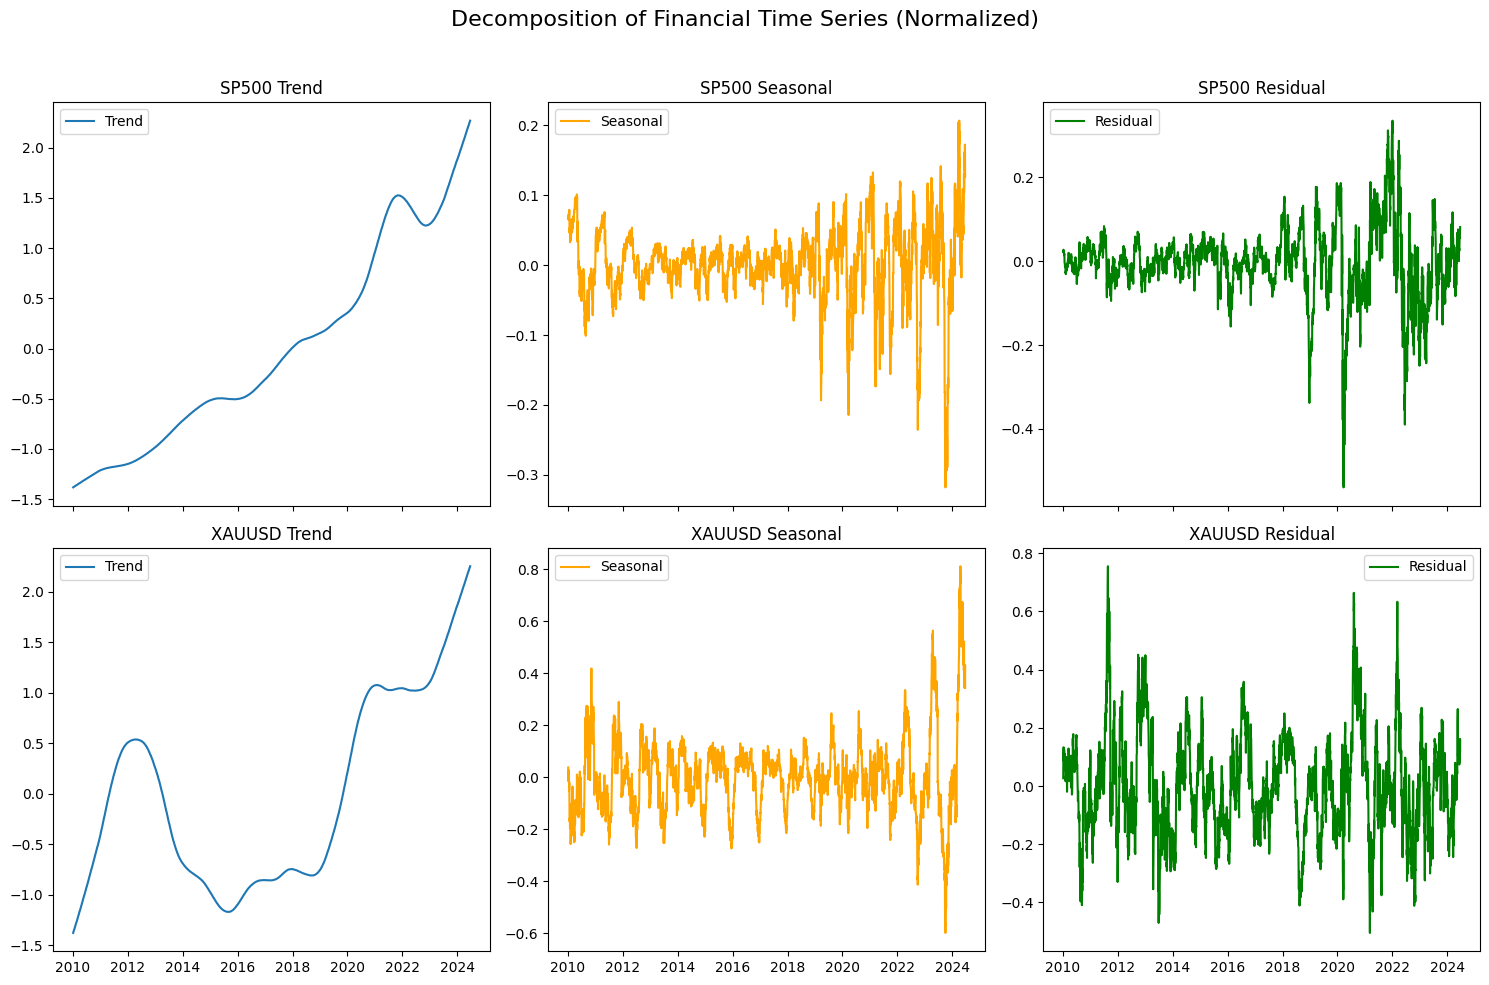

In [44]:
# @title
# Creación de las figuras y los ejes
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True)
fig.suptitle('Decomposition of Financial Time Series (Normalized)', fontsize=16)

# Dibujar cada serie
for i, (trend, seasonal, resid, title) in enumerate([
    (trend_sp500, seasonal_sp500, resid_sp500, 'SP500'),
    (trend_xauusd, seasonal_xauusd, resid_xauusd, 'XAUUSD')
]):
    axes[i, 0].plot(trend, label='Trend')
    axes[i, 0].set_title(f'{title} Trend')
    axes[i, 0].legend()

    axes[i, 1].plot(seasonal, label='Seasonal', color='orange')
    axes[i, 1].set_title(f'{title} Seasonal')
    axes[i, 1].legend()

    axes[i, 2].plot(resid, label='Residual', color='green')
    axes[i, 2].set_title(f'{title} Residual')
    axes[i, 2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()